In [1]:
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import pandas.api.types as ptypes
import seaborn as sns

SESSION_YEAR = 2025
SESSION_NAME = 'Las Vegas'
SESSION_TYPE = 'R'

# Grand Prix Data

## Get Season and sessions

In [2]:
schedule = fastf1.get_event_schedule(SESSION_YEAR)
print(schedule)

sessions = []
# Filter out testing events (RoundNumber = 0) and get only race sessions
race_schedule = schedule[schedule['RoundNumber'] > 0]

for rnd in race_schedule['RoundNumber']:
    session = fastf1.get_session(SESSION_YEAR, rnd, SESSION_TYPE)
    sessions.append(session)

print(f"Total sessions loaded: {len(sessions)}")


session = sessions[21]
session.load()
print(session.session_info)

# Alle Quicklaps auswählen (echte Rennrunden)
laps = session.laps.pick_quicklaps()
# Sicherstellen, dass keine NaT in LapTime ist
laps = laps.dropna(subset=['LapTime']).copy()

drivers = session.drivers

req         WARNING 	DEFAULT CACHE ENABLED! (1.37 GB) /home/fiete/.cache/fastf1


    RoundNumber               Country           Location  \
0             0               Bahrain             Sakhir   
1             1             Australia          Melbourne   
2             2                 China           Shanghai   
3             3                 Japan             Suzuka   
4             4               Bahrain             Sakhir   
5             5          Saudi Arabia             Jeddah   
6             6         United States      Miami Gardens   
7             7                 Italy              Imola   
8             8                Monaco             Monaco   
9             9                 Spain          Barcelona   
10           10                Canada           Montréal   
11           11               Austria          Spielberg   
12           12        United Kingdom        Silverstone   
13           13               Belgium  Spa-Francorchamps   
14           14               Hungary           Budapest   
15           15           Netherlands   

core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Total sessions loaded: 24


core        WARNING 	Fixed incorrect tyre stint information for driver '63'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '12', '16', '55', '6', '27', '44', '31', '87', '14', '22', '10', '30', '43', '23', '5', '18', '4', '81']


{'Meeting': {'Key': 1274, 'Name': 'Las Vegas Grand Prix', 'OfficialName': 'FORMULA 1 HEINEKEN LAS VEGAS GRAND PRIX 2025', 'Location': 'Las Vegas', 'Number': 22, 'Country': {'Key': 19, 'Code': 'USA', 'Name': 'United States'}, 'Circuit': {'Key': 152, 'ShortName': 'Las Vegas'}}, 'SessionStatus': 'Inactive', 'ArchiveStatus': {'Status': 'Generating'}, 'Key': 9858, 'Type': 'Race', 'Name': 'Race', 'StartDate': datetime.datetime(2025, 11, 22, 20, 0), 'EndDate': datetime.datetime(2025, 11, 22, 22, 0), 'GmtOffset': datetime.timedelta(days=-1, seconds=57600), 'Path': '2025/2025-11-22_Las_Vegas_Grand_Prix/2025-11-22_Race/'}


## Race lap comparison

req            INFO 	Using cached data for driver_info


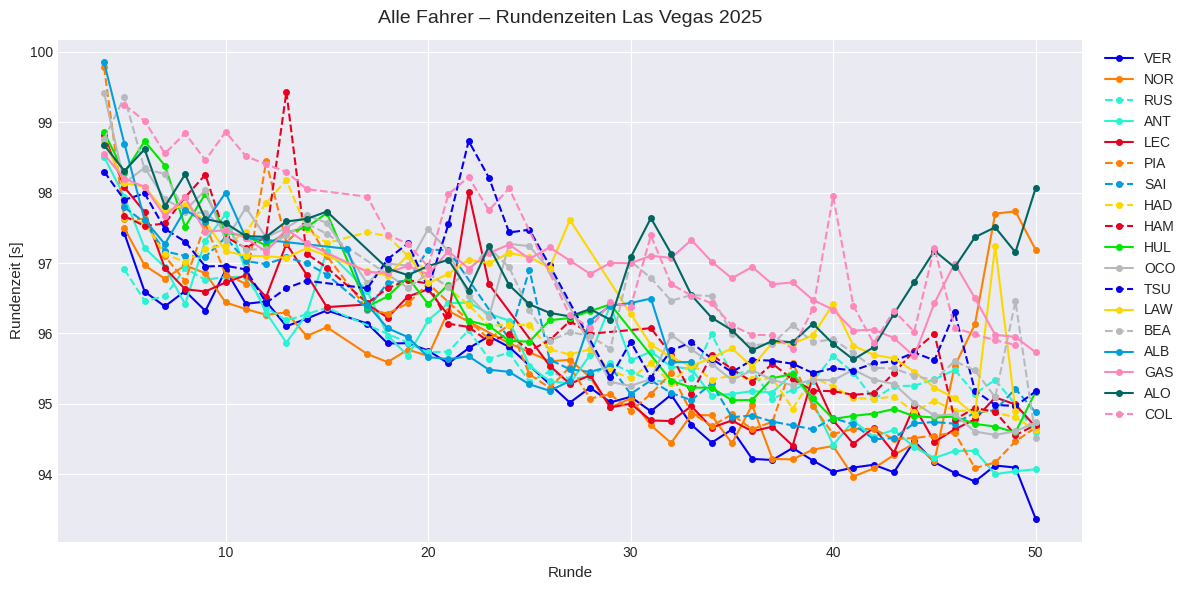

In [3]:
# Rundenzeiten in Sekunden umrechnen
laps['LapTime_sec'] = laps['LapTime'].dt.total_seconds()


# Fahrer sortieren nach durchschnittlicher Rundenzeit (für konsistente Farben/Legende)
driver_order = laps.groupby('Driver')['LapTime_sec'].mean().sort_values().index.tolist()

# Plot-Stil und Größe
plt.style.use('seaborn-v0_8-darkgrid')
rcParams['figure.figsize'] = (12, 6)

# Farben: colormap mit so vielen Farben wie Fahrer
n_drivers = len(driver_order)
cmap = plt.get_cmap('tab20', n_drivers) if n_drivers > 0 else plt.get_cmap('tab20')

# Plotten: jede Fahrerlinie etwas transparent, kleine Marker
fig, ax = plt.subplots()
for i, drv in enumerate(driver_order):
    d = laps[laps['Driver'] == drv]
    style = plotting.get_driver_style(identifier=drv, style=['color', 'linestyle'], session=session)
    if d.empty:
        continue
    ax.plot(d['LapNumber'], d['LapTime_sec'], marker='o', markersize=4, **style, label=drv)

# Achsen & Titel
ax.set_xlabel('Runde', fontsize=11)
ax.set_ylabel('Rundenzeit [s]', fontsize=11)
ax.set_title('Alle Fahrer – Rundenzeiten ' + session.event.Location + ' ' + str(session.date.year), fontsize=14, pad=12)

# Legende außerhalb des Plots (vermeidet Überlagerung)
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), frameon=False, ncol=1)

plt.tight_layout()
plt.show()


## Weather Data for Grand Prix

In [4]:
# Get weather data
weather = session.weather_data

### Temperature, Humidity, WindSpeed

                      Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0   0 days 00:00:06.103000     16.9      38.0     942.1     False       18.0   
1   0 days 00:01:06.100000     16.9      38.0     942.1     False       17.6   
2   0 days 00:02:06.103000     16.9      38.0     942.2     False       17.6   
3   0 days 00:03:06.103000     16.9      38.0     942.1     False       17.7   
4   0 days 00:04:06.105000     16.9      38.0     942.1     False       17.7   
..                     ...      ...       ...       ...       ...        ...   
136 0 days 02:16:06.726000     16.3      39.0     941.8     False       16.8   
137 0 days 02:17:06.739000     16.3      39.0     941.8     False       16.8   
138 0 days 02:18:06.729000     16.3      39.0     941.8     False       16.8   
139 0 days 02:19:06.718000     16.3      39.0     941.8     False       16.7   
140 0 days 02:20:06.722000     16.3      39.0     941.8     False       16.7   

     WindDirection  WindSpeed  
0      

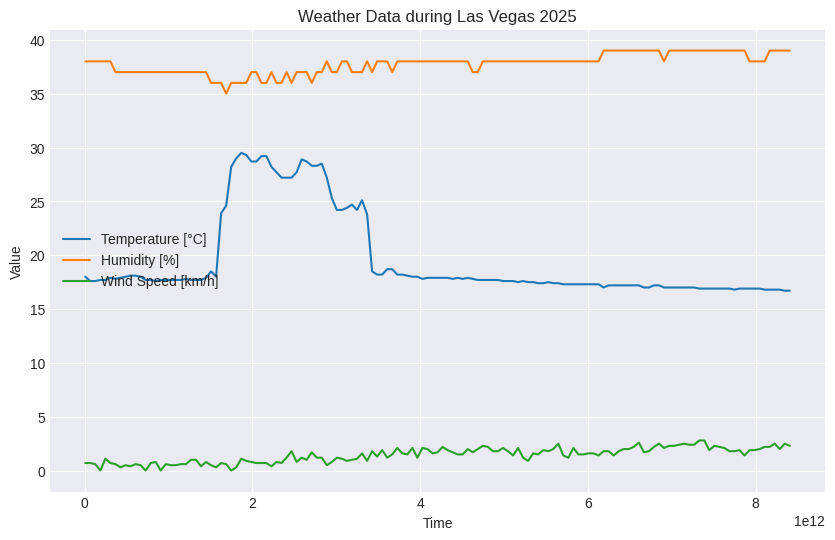

In [5]:
print(weather)
plt.figure(figsize=(10, 6))
plt.plot(weather['Time'], weather['TrackTemp'], label='Temperature [°C]')
plt.plot(weather['Time'], weather['Humidity'], label='Humidity [%]')
plt.plot(weather['Time'], weather['WindSpeed'], label='Wind Speed [km/h]')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Weather Data during ' + SESSION_NAME + ' ' + str(SESSION_YEAR))
plt.legend()
plt.show()


### Rainfall

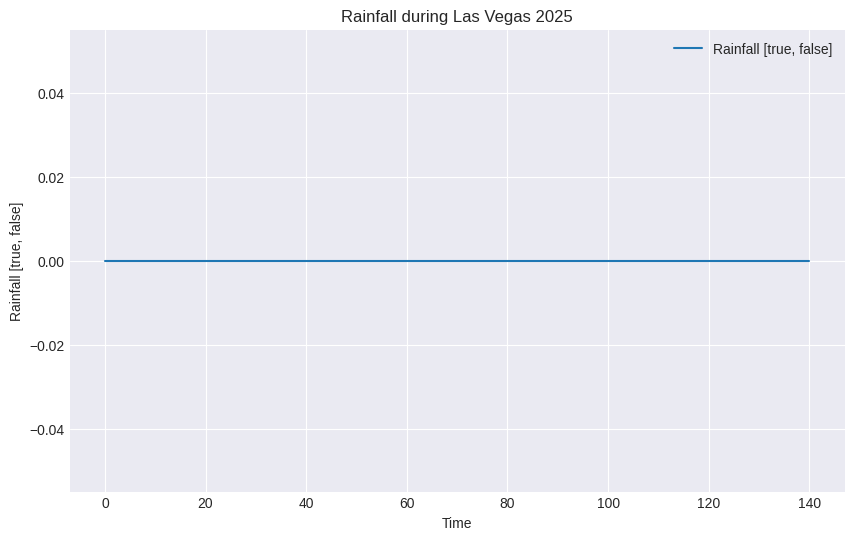

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(weather['Rainfall'], label='Rainfall [true, false]')
plt.xlabel('Time')
plt.ylabel('Rainfall [true, false]')
plt.title('Rainfall during ' + SESSION_NAME + ' ' + str(SESSION_YEAR))
plt.legend()
plt.show()

## Position changes

[Position changes during a race - FastF1](https://docs.fastf1.dev/gen_modules/examples_gallery/plot_position_changes.html)

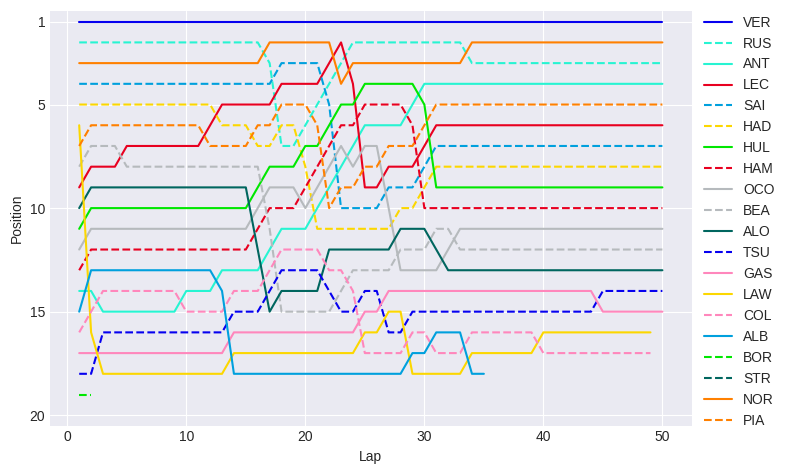

In [7]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))

for drv in session.drivers:
    drv_laps = session.laps.pick_drivers(drv)

    # skip drivers without laps (prevents .iloc[0] IndexError)
    if drv_laps.empty:
        continue

    # ensure laps are ordered by lap number before plotting
    drv_laps = drv_laps.sort_values('LapNumber')

    abb = drv_laps['Driver'].iloc[0]
    style = fastf1.plotting.get_driver_style(identifier=abb,
                                             style=['color', 'linestyle'],
                                             session=session)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, **style)

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

## Tyre Strategy

[Tyre strategies during a race - FastF1](https://docs.fastf1.dev/gen_modules/examples_gallery/plot_strategy.html)

In [8]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB    1.0     HARD            9
1     ALB    3.0     HARD           18
2     ALO    1.0   MEDIUM           12
3     ALO    2.0     HARD           33
4     ANT    2.0     HARD           46
5     BEA    1.0   MEDIUM           12
6     BEA    2.0     HARD           32
7     COL    1.0     HARD           18
8     COL    2.0   MEDIUM           23
9     GAS    2.0     HARD           45
10    HAD    1.0   MEDIUM           14
11    HAD    2.0     HARD           29
12    HAM    1.0     HARD           23
13    HAM    2.0   MEDIUM           20
14    HUL    1.0     HARD           25
15    HUL    2.0   MEDIUM           19
16    LAW    2.0     HARD           22
17    LAW    3.0     HARD           20
18    LEC    1.0   MEDIUM           19
19    LEC    2.0     HARD           25
20    NOR    1.0   MEDIUM           16
21    NOR    2.0     HARD           27
22    OCO    1.0   MEDIUM           22
23    OCO    2.0     HARD           22
24    PIA    1.0   MEDIUM

### Plot Tyre Strategies

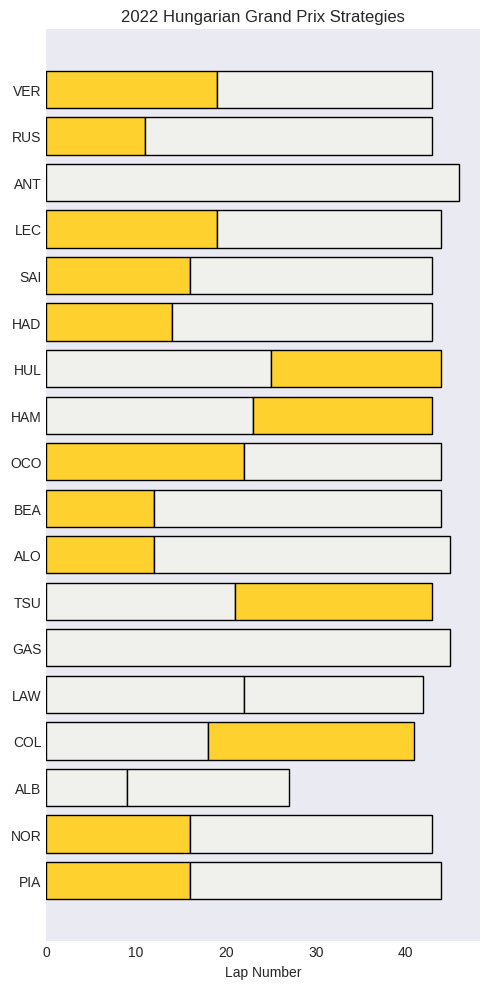

In [9]:
fig, ax = plt.subplots(figsize=(5, 10))
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("2022 Hungarian Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

## Lap Time Distribution

[Driver Laptimes Distribution Visualization - FastF1](https://docs.fastf1.dev/gen_modules/examples_gallery/plot_laptimes_distribution.html)

In [10]:
point_finishers = drivers[:10]
print(point_finishers)
driver_laps = session.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

['VER', 'RUS', 'ANT', 'LEC', 'SAI', 'HAD', 'HUL', 'HAM', 'OCO', 'BEA']


In [11]:
finishing_order = [session.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

['VER', 'RUS', 'ANT', 'LEC', 'SAI', 'HAD', 'HUL', 'HAM', 'OCO', 'BEA']


<Axes: xlabel='Driver', ylabel='LapTime(s)'>

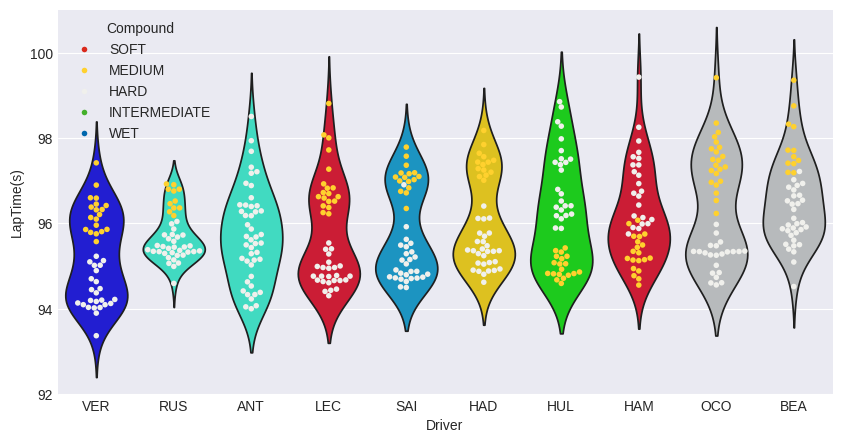

In [12]:
# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support,
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=fastf1.plotting.get_driver_color_mapping(session=session)
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.get_compound_mapping(session=session),
              hue_order=["SOFT", "MEDIUM", "HARD", "INTERMEDIATE", "WET"],
              linewidth=0,
              size=4,
              )